### 협업일지
#### 일자 : 2024-11-25 / 박하진

#### 오늘 할 일
- 9호선 지하철 혼잡도 일반과 급행 나눠서 다시 시각화하기
-
-

#### 오늘 한 일
- 9호선 지하철 혼잡도 일반과 급행 나눠서 다시 시각화하기
- 지하철 혼잡도 csv파일에 자치구 컬럼을 넣기 위해 필요 데이터를 수집,가공 후 병합하는 과정 진행 and 시각화
-

#### 내일 할 일
-
-
-

#### Codes

In [4]:
import pandas as pd

In [5]:
subway_info = pd.read_csv('../코드 작업/서울교통공사 역주소 및 전화번호_20241104.csv', encoding='euc-kr')
subway_info

,호선,역명,도로명주소,지번주소
0,1,서울,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)
1,1,시청,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선)
2,1,종각,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선)
3,1,종로3가,서울특별시 종로구 종로 지하129(종로3가),서울특별시 종로구 종로3가 10-5 종로3가역(1호선)
4,1,종로5가,서울특별시 종로구 종로 지하216(종로5가),서울특별시 종로구 종로5가 82-1 종로5가역(1호선)
...,...,...,...,...
269,9,송파나루,서울특별시 송파구 백제고분로 지하446(방이동),서울특별시 송파구 방이동 2 송파나루역(9호선)
270,9,한성백제,서울특별시 송파구 위례성대로 지하29(방이동),서울특별시 송파구 방이동 88-17 한성백제역(9호선)
271,9,올림픽공원,서울특별시 송파구 양재대로 지하1233(방이동),서울특별시 송파구 방이동 89-28 올림픽공원역(9호선)
272,9,둔촌오륜,서울특별시 강동구 강동대로 지하303(둔촌동),서울특별시 강동구 둔촌동 227-7 둔촌오륜역(9호선)


In [6]:
subway_1 = pd.read_csv('subway_1.csv', encoding='utf-8')
subway_1

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
0,1,평일,서울,523.400,601.100,37.553150,126.972533
1,1,휴일,서울,358.100,751.700,37.553150,126.972533
2,1,평일,시청,444.400,604.800,37.563590,126.975407
3,1,휴일,시청,340.700,723.700,37.563590,126.975407
4,1,평일,종각,393.400,579.700,37.570203,126.983116
...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708


In [7]:
import pandas as pd
import re

def extract_district(address):
    match = re.search(r'서울특별시 (\S+)', address)
    if match:
        return match.group(1)  
    return None  

subway_info['자치구'] = subway_info['도로명주소'].apply(extract_district)
subway_info.pop('도로명주소')
subway_info.pop('지번주소')
subway_info

,호선,역명,자치구
0,1,서울,중구
1,1,시청,중구
2,1,종각,종로구
3,1,종로3가,종로구
4,1,종로5가,종로구
...,...,...,...
269,9,송파나루,송파구
270,9,한성백제,송파구
271,9,올림픽공원,송파구
272,9,둔촌오륜,강동구


In [8]:
merged_data = pd.merge(subway_1, subway_info[['호선', '역명', '자치구']], on=['호선', '역명'], how='left')
merged_data.to_csv('자치구별_지하철_혼잡도.csv', index=False)

merged_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도,자치구
0,1,평일,서울,523.400,601.100,37.553150,126.972533,중구
1,1,휴일,서울,358.100,751.700,37.553150,126.972533,중구
2,1,평일,시청,444.400,604.800,37.563590,126.975407,중구
3,1,휴일,시청,340.700,723.700,37.563590,126.975407,중구
4,1,평일,종각,393.400,579.700,37.570203,126.983116,종로구
...,...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939,NaN
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311,송파구
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311,송파구
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708,NaN


In [9]:
merged_data.iloc[126:128, -1] = '강서구'
merged_data.iloc[210:212, -1] = '강북구'
merged_data.iloc[352:354, -1] = '경기도'
merged_data.iloc[354:356, -1] = '경기도'
merged_data.iloc[356:358, -1] = '경기도'
merged_data.iloc[358:360, -1] = '경기도'
merged_data.iloc[442:444, -1] = '경기도'
merged_data.iloc[480:482, -1] = '광진구'
merged_data.iloc[496:498, -1] = '동작구'
merged_data.iloc[518:520, -1] = '경기도'
merged_data.iloc[520:522, -1] = '경기도'
merged_data.iloc[548:562, -1] = '경기도'
merged_data.iloc[128:130, -1] = '경기도'
merged_data.iloc[562:566, -1] = '강서구'
merged_data.iloc[566:568, -1] = '강서구'
merged_data.iloc[568:572, -1] = '서초구'
merged_data.iloc[572:574, -1] = '강서구'
merged_data.iloc[574:576, -1] = '서초구'
merged_data.iloc[576:578, -1] = '영등포구'
merged_data.iloc[578:582, -1] = '강서구'
merged_data.iloc[582:584, -1] = '동작구'
merged_data.iloc[584:588, -1] = '동작구'
merged_data.iloc[588:592, -1] = '영등포구'
merged_data.iloc[592:596, -1] = '동작구'
merged_data.iloc[598:600, -1] = '양천구'
merged_data.iloc[600:604, -1] = '강서구'
merged_data.iloc[608:610, -1] = '서초구'
merged_data.iloc[614:616, -1] = '영등포구'
merged_data.iloc[622:624, -1] = '영등포구'
merged_data.iloc[630:634, -1] = '강남구'
merged_data.iloc[634:636, -1] = '양천구'
merged_data.iloc[636:638, -1] = '서초구'
merged_data.iloc[638:640, -1] = '강서구'
merged_data.iloc[640:642, -1] = '강서구'
merged_data.iloc[644:648, -1] = '영등포구'
merged_data.iloc[648:652, -1] = '강서구'
merged_data.iloc[664:666, -1] = '강서구'
merged_data.iloc[668:670, -1] = '동작구'

merged_data.to_csv('자치구별_지하철_혼잡도.csv', index=False)

merged_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도,자치구
0,1,평일,서울,523.400,601.100,37.553150,126.972533,중구
1,1,휴일,서울,358.100,751.700,37.553150,126.972533,중구
2,1,평일,시청,444.400,604.800,37.563590,126.975407,중구
3,1,휴일,시청,340.700,723.700,37.563590,126.975407,중구
4,1,평일,종각,393.400,579.700,37.570203,126.983116,종로구
...,...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939,강서구
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311,송파구
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311,송파구
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708,동작구


In [10]:
merged_data = merged_data[~merged_data['자치구'].str.contains('경기도', na=False)]

merged_data.to_csv('자치구별_지하철_혼잡도.csv', index=False)

merged_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도,자치구
0,1,평일,서울,523.400,601.100,37.553150,126.972533,중구
1,1,휴일,서울,358.100,751.700,37.553150,126.972533,중구
2,1,평일,시청,444.400,604.800,37.563590,126.975407,중구
3,1,휴일,시청,340.700,723.700,37.563590,126.975407,중구
4,1,평일,종각,393.400,579.700,37.570203,126.983116,종로구
...,...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939,강서구
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311,송파구
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311,송파구
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708,동작구


In [11]:
weekday_data = merged_data[merged_data['요일구분'].str.contains('평일', na=False)]
weekend_data = merged_data[merged_data['요일구분'].str.contains('휴일', na=False)]

In [12]:
weekday_grouped_출근 = weekday_data.groupby('자치구')['출근시간혼잡도'].mean().reset_index()
weekday_grouped_출근 = weekday_grouped_출근.rename(columns={'출근시간혼잡도': '평일_출근시간혼잡도'})
weekday_sorted_출근 = weekday_grouped_출근.sort_values(by='평일_출근시간혼잡도', ascending=False)

weekday_sorted_출근

,자치구,평일_출근시간혼잡도
4,관악구,797.950000
11,동작구,750.971000
5,광진구,732.645455
19,영등포구,711.075333
14,서초구,688.068706
13,서대문구,647.780000
7,금천구,645.700000
18,양천구,624.600571
6,구로구,613.475000
2,강북구,603.633333


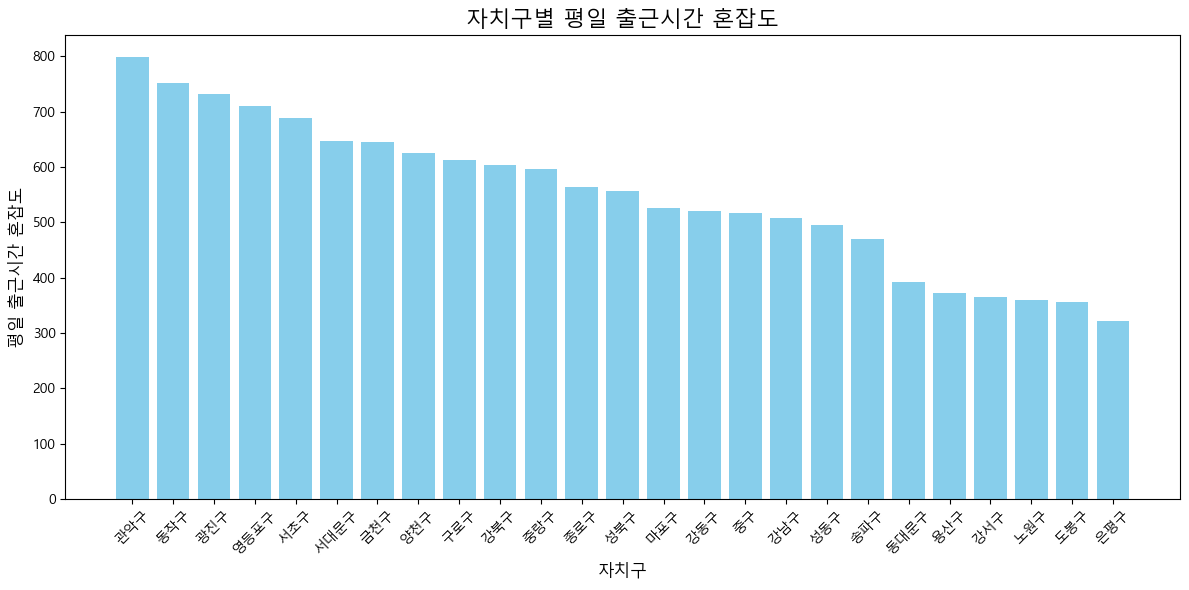

In [13]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))  
plt.bar(weekday_sorted_출근['자치구'], weekday_sorted_출근['평일_출근시간혼잡도'], color='skyblue')

plt.title('자치구별 평일 출근시간 혼잡도', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('평일 출근시간 혼잡도', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

In [14]:
weekday_grouped_퇴근 = weekday_data.groupby('자치구')['퇴근시간혼잡도'].mean().reset_index()
weekday_grouped_퇴근 = weekday_grouped_퇴근.rename(columns={'퇴근시간혼잡도': '평일_퇴근시간혼잡도'})
weekday_sorted_퇴근 = weekday_grouped_퇴근.sort_values(by='평일_퇴근시간혼잡도', ascending=False)

weekday_sorted_퇴근

,자치구,평일_퇴근시간혼잡도
7,금천구,814.100000
14,서초구,776.948235
19,영등포구,764.904000
11,동작구,721.899667
4,관악구,719.100000
5,광진구,700.136364
13,서대문구,655.460000
22,종로구,646.100000
23,중구,626.569565
0,강남구,621.812800


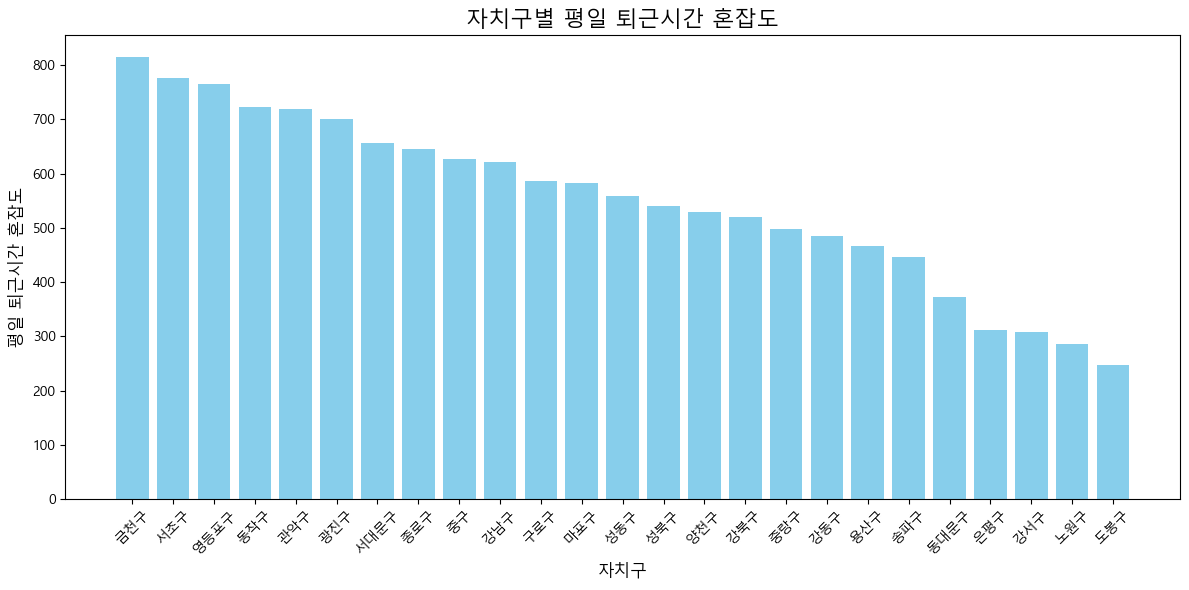

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))  
plt.bar(weekday_sorted_퇴근['자치구'], weekday_sorted_퇴근['평일_퇴근시간혼잡도'], color='skyblue')

plt.title('자치구별 평일 퇴근시간 혼잡도', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('평일 퇴근시간 혼잡도', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

In [16]:
weekend_grouped_출근 = weekend_data.groupby('자치구')['출근시간혼잡도'].mean().reset_index()
weekend_grouped_출근 = weekend_grouped_출근.rename(columns={'출근시간혼잡도': '휴일_출근시간혼잡도'})
weekend_sorted_출근 = weekend_grouped_출근.sort_values(by='휴일_출근시간혼잡도', ascending=False)

weekend_sorted_출근

,자치구,휴일_출근시간혼잡도
4,관악구,658.275000
5,광진구,631.045455
2,강북구,626.600000
24,중랑구,577.487500
7,금천구,529.800000
16,성북구,521.633333
22,종로구,475.846667
1,강동구,475.621875
13,서대문구,473.580000
6,구로구,448.487500


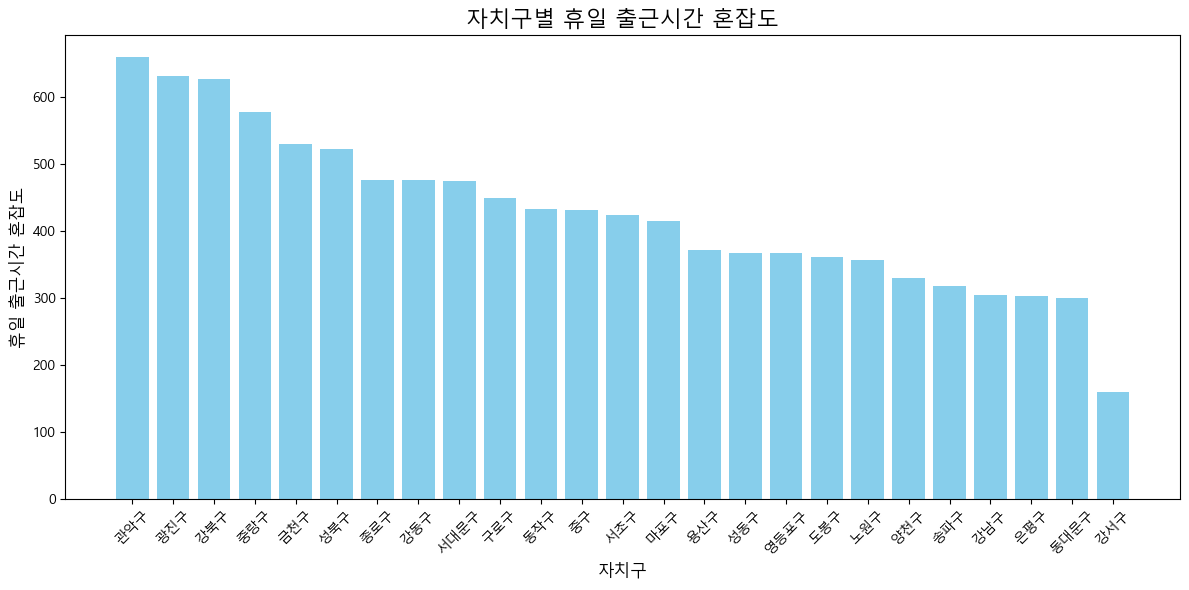

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))  
plt.bar(weekend_sorted_출근['자치구'], weekend_sorted_출근['휴일_출근시간혼잡도'], color='skyblue')

plt.title('자치구별 휴일 출근시간 혼잡도', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('휴일 출근시간 혼잡도', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

In [18]:
weekend_grouped_퇴근 = weekend_data.groupby('자치구')['퇴근시간혼잡도'].mean().reset_index()
weekend_grouped_퇴근 = weekend_grouped_퇴근.rename(columns={'퇴근시간혼잡도': '휴일_퇴근시간혼잡도'})
weekend_sorted_퇴근 = weekend_grouped_퇴근.sort_values(by='휴일_퇴근시간혼잡도', ascending=False)

weekend_sorted_퇴근

,자치구,휴일_퇴근시간혼잡도
5,광진구,1008.036364
4,관악구,963.250000
12,마포구,953.312500
23,중구,928.582609
22,종로구,876.800000
13,서대문구,852.060000
20,용산구,827.770000
14,서초구,787.826176
7,금천구,782.800000
15,성동구,763.193750


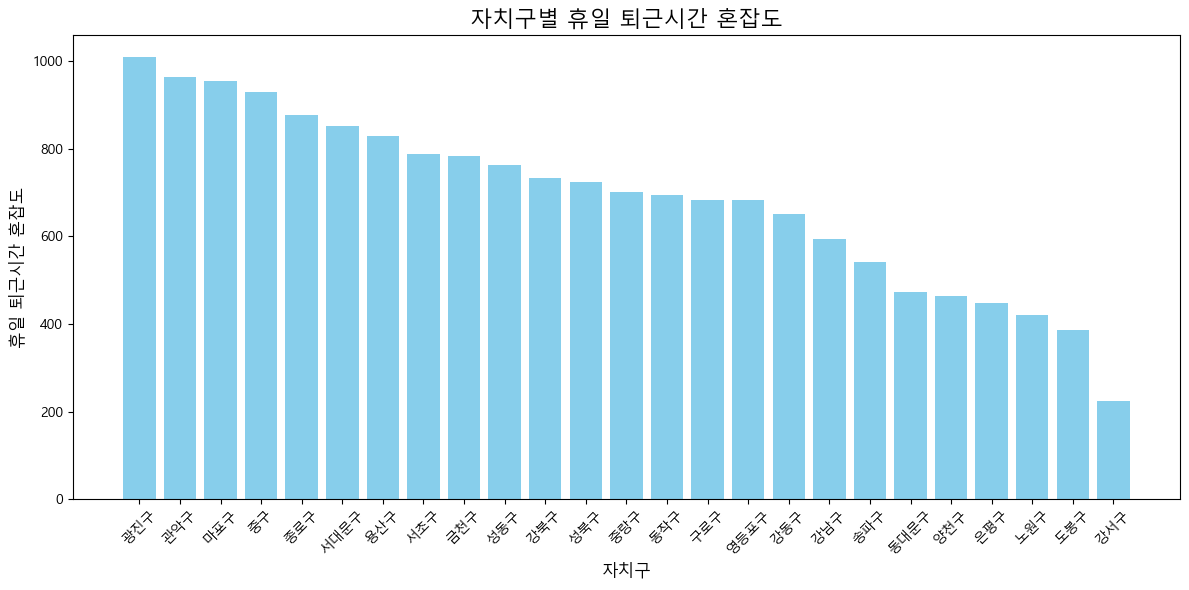

In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))  
plt.bar(weekend_sorted_퇴근['자치구'], weekend_sorted_퇴근['휴일_퇴근시간혼잡도'], color='skyblue')

plt.title('자치구별 휴일 퇴근시간 혼잡도', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('휴일 퇴근시간 혼잡도', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

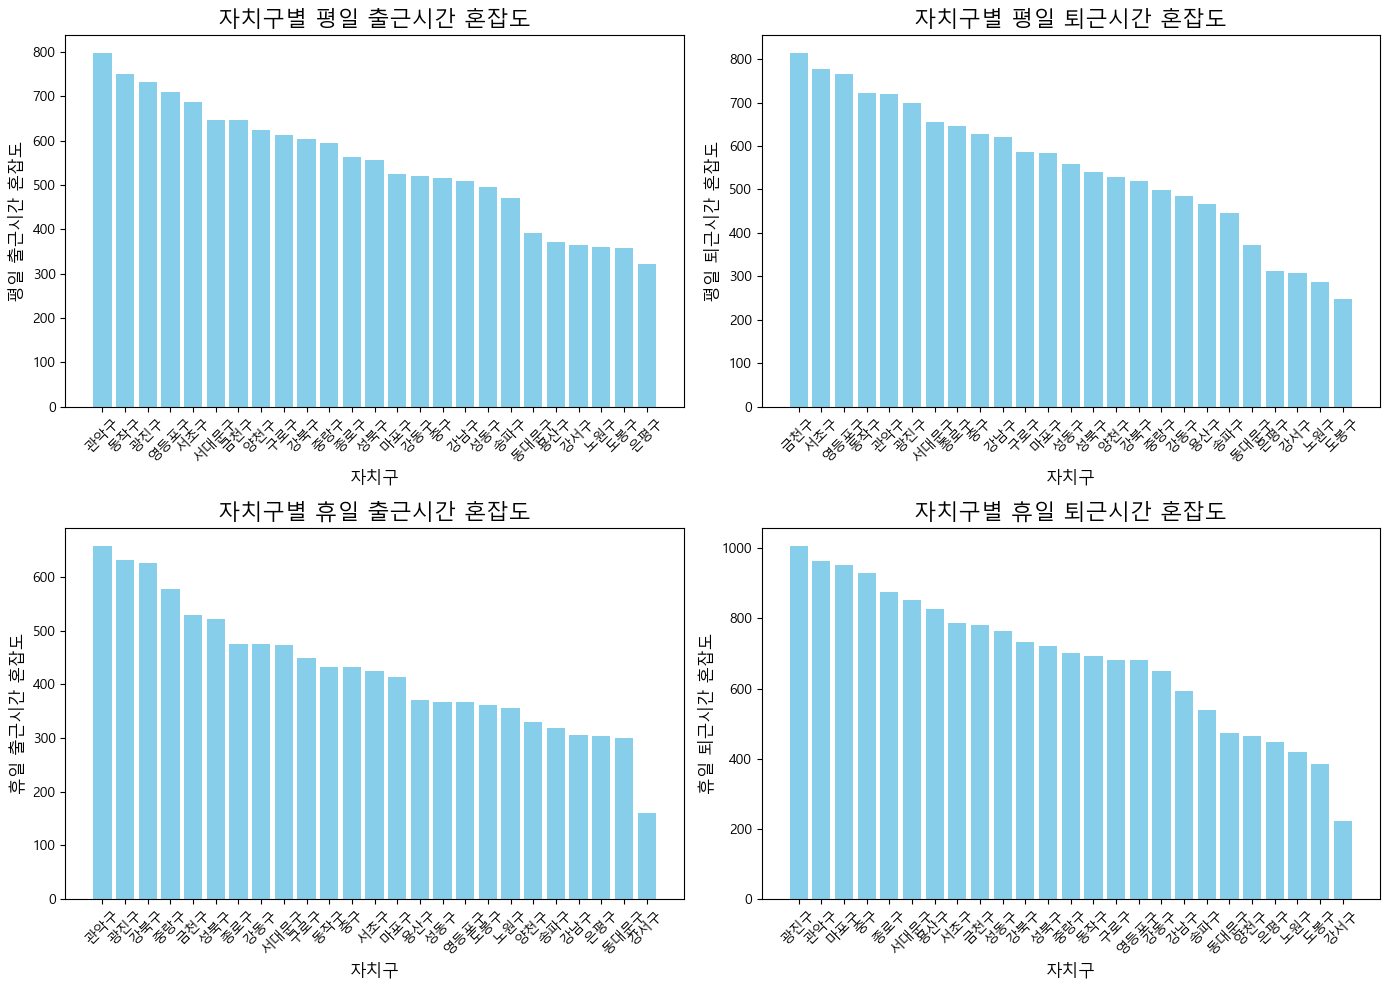

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].bar(weekday_sorted_출근['자치구'], weekday_sorted_출근['평일_출근시간혼잡도'], color='skyblue')
axs[0, 0].set_title('자치구별 평일 출근시간 혼잡도', fontsize=16)
axs[0, 0].set_xlabel('자치구', fontsize=12)
axs[0, 0].set_ylabel('평일 출근시간 혼잡도', fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(weekday_sorted_퇴근['자치구'], weekday_sorted_퇴근['평일_퇴근시간혼잡도'], color='skyblue')
axs[0, 1].set_title('자치구별 평일 퇴근시간 혼잡도', fontsize=16)
axs[0, 1].set_xlabel('자치구', fontsize=12)
axs[0, 1].set_ylabel('평일 퇴근시간 혼잡도', fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].bar(weekend_sorted_출근['자치구'], weekend_sorted_출근['휴일_출근시간혼잡도'], color='skyblue')
axs[1, 0].set_title('자치구별 휴일 출근시간 혼잡도', fontsize=16)
axs[1, 0].set_xlabel('자치구', fontsize=12)
axs[1, 0].set_ylabel('휴일 출근시간 혼잡도', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].bar(weekend_sorted_퇴근['자치구'], weekend_sorted_퇴근['휴일_퇴근시간혼잡도'], color='skyblue')
axs[1, 1].set_title('자치구별 휴일 퇴근시간 혼잡도', fontsize=16)
axs[1, 1].set_xlabel('자치구', fontsize=12)
axs[1, 1].set_ylabel('휴일 퇴근시간 혼잡도', fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Issues & Challenges
- 상세주소가 빈값이 많아 일일히 찾아서 넣는 수작업이 조금 힘들었습니다.
-
-

#### Reflection
-
-
-